### Noise calculations for paper revisions


This notebook explores the model training noise as requested during the first round of paper review.

We use the conda environment `analysis`


#### Define paths to model files

In [1]:
root = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/processed_data/trained_models/'
model_1 = f'{root}V20X_noise_expt_1/'
model_2 = f'{root}V20X_noise_expt_2/'
model_3 = f'{root}V20X_noise_expt_3/'
model_4 = f'{root}V20X_noise_expt_4/'

#### Define some useful functions

In [2]:
import pandas as pd
def load_predictions(path):

    df = pd.read_parquet(path+'predictions.parquet')
    
    
    #Calculate some extra columns
    df['model_predicion_bias'] = df.MODIS_LST - df.predictions
    df['model_predicion_error'] = abs(df.MODIS_LST - df.predictions)
        
    df['ERA_predicion_bias'] = df.MODIS_LST - df.skt_unnormalised
    df['ERA_predicion_error'] = abs(df.MODIS_LST - df.skt_unnormalised)


    print ('----------------------------------MODEL-------------------------------------------------')
    print("Mean/Median/Std prediction bias:", df['model_predicion_bias'].mean(), df['model_predicion_bias'].median(),df['model_predicion_bias'].std())
    print("Mean/Median/Std prediction error:", df['model_predicion_error'].mean(), df['model_predicion_error'].median(),df['model_predicion_error'].std())
    # print ('------------------------------------ERA---------------------------------------------------')
    # print("Mean/Median/Std prediction bias:", df['ERA_predicion_bias'].mean(), df['ERA_predicion_bias'].median(),df['ERA_predicion_bias'].std())
    # print("Mean/Median/Std prediction error:", df['ERA_predicion_error'].mean(), df['ERA_predicion_error'].median(),df['ERA_predicion_error'].std())
    # print ('-------------------------------------------------------------------------------------------')

    
    
    #Average predictions and errors over the year
    df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean() 
    
    
    
    
    
    return df,df_grouped

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 




        
        
        
def global_plot(df,z,projection,vmin,vmax,cmap,absolute_values,logscale,title,markersize,savefig):
    
    
        
       # ccrs.Robinson()
        
    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=projection)
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    try:
        x = df.longitude
        y = df.latitude
    except: #different sources call lat/lon different things
        x = df.longitude_ERA
        y = df.latitude_ERA

    z1 = df[z]
    if absolute_values:
        z1 = abs(z1)
        if vmin < 0:
            vmin = 0 # dont need negative vmins if plotting absolute values
    
    
    #Normalize, colorbars
    if vmin is None:
        vmin = min(z1)
    if vmax is None:
        vmax = max(z1)
        

     #Cmaps, normalisations
    if logscale:
        norm = mc.LogNorm(vmin=vmin, vmax=vmax)
        z1 = abs(z1)
    else:
        norm = mc.Normalize(vmin=vmin, vmax=vmax)

    
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
    
    
    
    
    
    
    #Scatter points
    sc = ax.scatter(x,y,transform=ccrs.PlateCarree(), #Always PlateCarree
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')


    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(r'$\delta$K',fontsize=34)

    ax.set_title(title)    
    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    #ax.set_xlim(-180,180)

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)   
        
        
        
        
            

In [3]:
models_to_compare = [model_1,model_2, model_3,model_4]


annually_averaged_dfs = []
for m in models_to_compare:
    predictions,predictions_averaged = load_predictions(m)
    annually_averaged_dfs.extend([predictions_averaged])



----------------------------------MODEL-------------------------------------------------
Mean/Median/Std prediction bias: 0.027514113 0.176727294921875 3.726653814315796
Mean/Median/Std prediction error: 2.9039862 2.21014404296875 2.4494988918304443


<ipython-input-2-019f89ba43d9>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()


----------------------------------MODEL-------------------------------------------------
Mean/Median/Std prediction bias: 0.09134957 0.246063232421875 3.7221148014068604
Mean/Median/Std prediction error: 2.903454 2.2080078125 2.4453623294830322


<ipython-input-2-019f89ba43d9>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()


----------------------------------MODEL-------------------------------------------------
Mean/Median/Std prediction bias: 0.0630729 0.195037841796875 3.746485471725464
Mean/Median/Std prediction error: 2.9238696 2.227630615234375 2.4557199478149414


<ipython-input-2-019f89ba43d9>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()


----------------------------------MODEL-------------------------------------------------
Mean/Median/Std prediction bias: 0.0765716 0.221038818359375 3.7533504962921143
Mean/Median/Std prediction error: 2.9316843 2.2370452880859375 2.456343412399292


<ipython-input-2-019f89ba43d9>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()


#### Load the change in fields file - we will use this to categorise gridpoints

In [4]:
change_in_fields = pd.read_pickle('tmp_data/change_in_fields.pkl')
change_in_fields['latitude_join'] = round(change_in_fields.latitude_ERA,3)
change_in_fields['longitude_join'] = round(change_in_fields.longitude_ERA,3) #just used for joining due to loss of precision from Margs file

In [5]:
change_in_fields.columns

Index(['latitude_ERA', 'longitude_ERA', 'V15_clFr', 'V15_cvhFr', 'V15_cvlFr',
       'V15_dl', 'V15_oceanFr', 'V15_si10Fr', 'V15_z', 'V20_clFr', 'V20_cvhFr',
       'V20_cvlFr', 'V20_dl', 'V20_oceanFr', 'V20_si10Fr', 'V20_z',
       'changeAbs_V20V15_clFr', 'changeAbs_V20V15_cvhFr',
       'changeAbs_V20V15_cvlFr', 'changeAbs_V20V15_oceanFr',
       'changeAbs_V20V15_si10Fr', 'changeAbs_V20V15_dl', 'changeAbs_V20V15_z',
       'clFr_change_is_significant', 'cvhFr_change_is_significant',
       'cvlFr_change_is_significant', 'oceanFr_change_is_significant',
       'si10Fr_change_is_significant', 'dl_change_is_significant',
       'z_change_is_significant', 'bitstring', 'latitude_join',
       'longitude_join'],
      dtype='object')

#### Create a new df and concat it with the change in fields df

In [6]:
#Create a new df that will just hold the differences   

df =annually_averaged_dfs[0] #pick a df to get latitudes 
data = { 'latitude_ERA':     df.latitude_ERA, 
         'longitude_ERA':    df.longitude_ERA,
         'MODIS_LST':        df.MODIS_LST,
          'latitude_join':    round(df.latitude_ERA,3), 
          'longitude_join':    round(df.longitude_ERA,3)}


i = 1
selected_cols = [] #we will use this later when computing variances
for df in annually_averaged_dfs:
    data[f'prediction_error_{i}'] = df['model_predicion_error']
    data[f'prediction_{i}'] = df['predictions']

    selected_cols.extend([f'prediction_error_{i}'])
    i = i+1

df_new = pd.DataFrame(data)   

In [7]:
#Join and save
df_cat = pd.merge(df_new,change_in_fields,how='inner',on=['latitude_join', 'longitude_join'],suffixes=('', '_y')) #inner join.
df_cat = df_cat.drop(['latitude_join', 'longitude_join','latitude_ERA_y', 'longitude_ERA_y'], axis=1) #Get rid of junk columns

#### LAKES

In [8]:
pd.options.mode.chained_assignment = None #Ignore SettingWithCopyWarning - we are safe here


def surface_noise_numbers(df):
    df['variance']=df[selected_cols].var(axis=1) #variance over the prediciton errors i.e. noise 
    df['median_error']=df[selected_cols].median(axis=1) #mean over the prediciton errors 
    df['mean_error']=df[selected_cols].mean(axis=1) #mean over the prediciton errors 
    
    print("Numer of grid points:", len(df))
    print("Median variance:", df['variance'].median())
    print("Mean variance:", df['variance'].mean())
    
    print("Median median error:", df['median_error'].median())
    print("Mean mean error:", df['mean_error'].mean())
    
    df['variance'].hist(bins=100,figsize=(12,8))





Numer of grid points: 1631
Median variance: 0.007540588732808828
Mean variance: 0.09111467
Median median error: 2.623079299926758
Mean mean error: 2.8241506


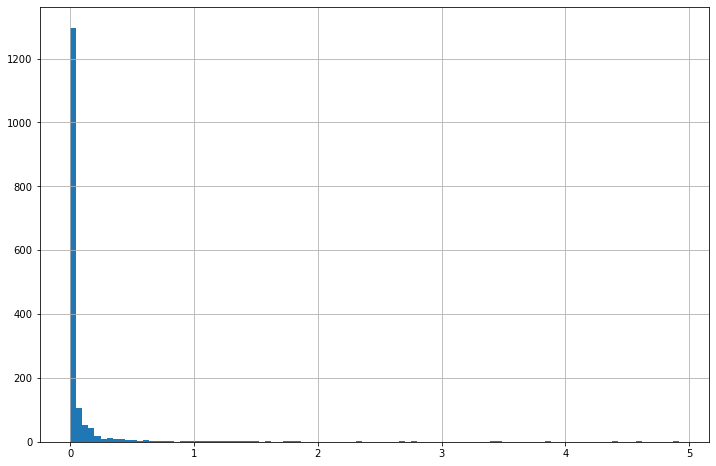

In [9]:
df_lake = df_cat.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not si10Fr_change_is_significant')
surface_noise_numbers(df_lake)

#### Lake ground

In [10]:
df_lake_ground = df_cat.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not cvhFr_change_is_significant & not cvlFr_change_is_significant')


Numer of grid points: 546
Median variance: 0.022429846227169037
Mean variance: 0.20212665
Median median error: 2.809966802597046
Mean mean error: 3.1159592


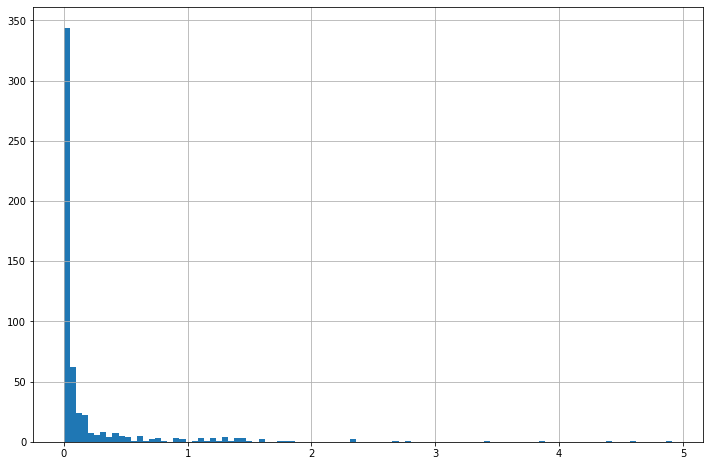

In [11]:
surface_noise_numbers(df_lake_ground)

#### Vegetation

In [12]:
df_vegetation = df_cat.query('cvhFr_change_is_significant & not clFr_change_is_significant')


In [13]:
df_vegetation

,latitude_ERA,longitude_ERA,MODIS_LST,prediction_error_1,prediction_1,prediction_error_2,prediction_2,prediction_error_3,prediction_3,prediction_error_4,...,changeAbs_V20V15_dl,changeAbs_V20V15_z,clFr_change_is_significant,cvhFr_change_is_significant,cvlFr_change_is_significant,oceanFr_change_is_significant,si10Fr_change_is_significant,dl_change_is_significant,z_change_is_significant,bitstring
2502,-51.288034,-73.333333,274.249908,4.035625,274.730957,4.062469,275.254730,3.856266,274.942383,4.500080,...,126.085938,9.123047,False,True,True,False,True,True,False,0111010
2670,-49.039793,-72.916667,280.344543,3.269053,277.732117,4.737883,275.964935,3.241728,277.935944,3.732963,...,269.878906,15.490234,False,True,True,False,True,True,False,0111010
2695,-48.758762,-73.200000,275.938141,4.227142,273.901581,4.424513,273.631744,4.767867,272.294800,5.463942,...,132.000000,44.298828,False,True,False,False,True,True,False,0101010
2722,-48.477732,-72.400000,280.743073,3.725008,278.443726,3.350562,278.635895,3.901087,277.850739,5.010287,...,385.374023,19.384766,False,True,False,False,True,True,False,0101010
2771,-47.915672,-72.800000,280.819336,5.271523,276.309052,5.331113,276.380249,4.968412,276.568787,6.230963,...,401.000000,7.451172,False,True,False,False,True,True,False,0101010
2818,-47.353611,-73.200000,279.468872,3.954410,277.855377,3.202947,279.014557,4.186087,277.123993,3.490772,...,258.406250,3.751953,False,True,True,False,True,True,False,0111010
2844,-47.072581,-73.200000,278.869751,5.600022,275.082428,4.421630,277.518799,5.369361,275.258789,5.268923,...,220.000000,1.201172,False,True,False,False,True,True,False,0101010
2873,-46.791551,-73.200000,278.926392,5.428130,276.366974,5.422084,275.428528,5.534277,275.176056,7.305271,...,220.000000,8.322266,False,True,True,False,False,True,False,0111000
2903,-46.510520,-73.125000,281.607971,4.744163,277.620941,4.149755,278.342102,4.052215,278.441193,4.719357,...,220.000000,5.251953,False,True,False,False,False,True,False,0101000
2933,-46.229490,-73.125000,281.318878,4.492006,277.081238,4.122442,277.511200,3.744014,277.977783,5.120825,...,220.000000,1.681641,False,True,False,False,False,True,False,0101000


Numer of grid points: 58
Median variance: 0.21369768679141998
Mean variance: 0.4162936
Median median error: 3.3025991916656494
Mean mean error: 3.4502776


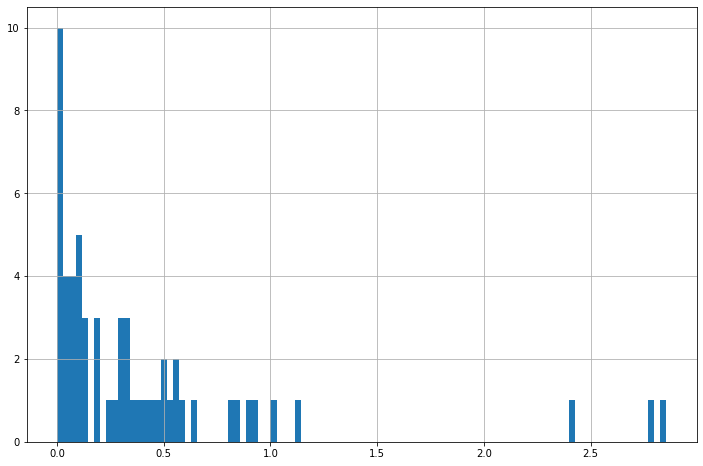

In [14]:
surface_noise_numbers(df_vegetation)

#### Glacier

Numer of grid points: 1057
Median variance: 0.06052311137318611
Mean variance: 0.14116853
Median median error: 4.181339740753174
Mean mean error: 4.3886313


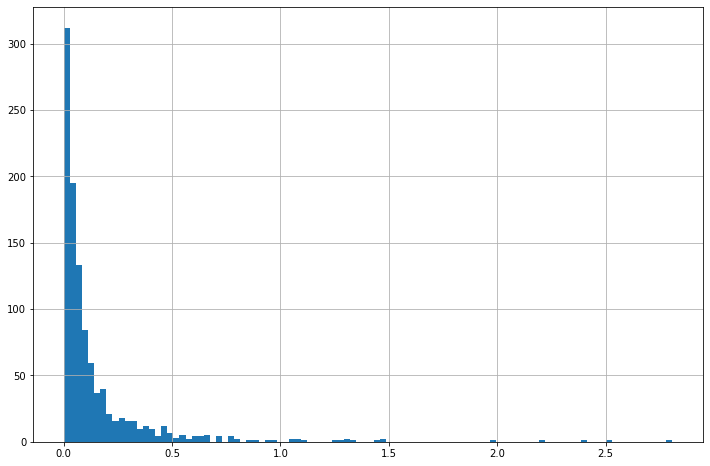

In [15]:
df_glacier = df_cat.query('si10Fr_change_is_significant')
surface_noise_numbers(df_glacier)

#### Deep dive on individual bad points

In [16]:
lake_natron = df_lake.query('latitude_ERA == -2.3887580539270044 & longitude_ERA == 36.0000')
lake_natron_northern_edge =df_lake.query('latitude_ERA == -2.10772769472398 & longitude_ERA == 36.0000') 
lake_blanche =df_lake.query('latitude_ERA ==  -29.367671674745356 & longitude_ERA == 139.6875') 
salt_lake_city =df_lake.query('latitude_ERA ==  41.17094491970063 & longitude_ERA ==  -113.39999999999998') 
farah_province =df_lake.query('latitude_ERA ==  31.615914311651938 & longitude_ERA == 61.120000000000005') 
gujarat_province =df_lake.query('latitude_ERA ==  24.028095261448925 & longitude_ERA ==  69.0') 
toshka_lakes =df_lake.query('latitude_ERA ==  23.18500423251539 & longitude_ERA ==  30.900000000000006') 
all_northern_canada_points = df_lake.query('50.0 < latitude_ERA & -130 < longitude_ERA < -80')

caspain_1 = df_lake.query('latitude_ERA ==  46.22948997297545 & longitude_ERA ==   49.125')
caspain_2 = df_lake.query('latitude_ERA ==  46.22948997297545 & longitude_ERA ==    49.5')
caspain_3 = df_lake.query('latitude_ERA ==  46.51052023808231 & longitude_ERA ==    49.5')
caspain_4 = df_lake.query('latitude_ERA ==  47.072580762649004 & longitude_ERA ==    51.599999999999994')

caspian_edge = pd.concat([caspain_1,caspain_2,caspain_3,caspain_4])

bering_glacier = df_glacier.query('latitude_ERA == 60.280999861571715   & longitude_ERA ==    -143.4666666666667')
juncal_glacier = df_glacier.query('latitude_ERA == -33.021065936911214   & longitude_ERA ==    -70.07999999999998')


In [17]:
selected_dfs = dict({'lake_natron':lake_natron,
                     'lake_natron_northern_edge':lake_natron_northern_edge,
                     'lake_blanche':lake_blanche,
                     'salt_lake_city':salt_lake_city,
                     'farah_province':farah_province,
                     'gujarat_province':gujarat_province,
                     'toshka_lakes':toshka_lakes,
                     'all_northern_canada_points':all_northern_canada_points,
                     'caspian_edge':caspian_edge,
                     'bering_glacier':bering_glacier,
                     'juncal_glacier':juncal_glacier})

lake_natron
Numer of grid points: 1
Median variance: 0.37782856822013855
Mean variance: 0.37782857
Median median error: 6.190906524658203
Mean mean error: 6.2121334
************************
lake_natron_northern_edge
Numer of grid points: 1
Median variance: 0.04086225852370262
Mean variance: 0.04086226
Median median error: 4.318356513977051
Mean mean error: 4.3409266
************************
lake_blanche
Numer of grid points: 1
Median variance: 0.10238734632730484
Mean variance: 0.10238735
Median median error: 2.8407955169677734
Mean mean error: 2.8753824
************************
salt_lake_city
Numer of grid points: 1
Median variance: 0.5077674388885498
Mean variance: 0.50776744
Median median error: 4.182750225067139
Mean mean error: 4.214996
************************
farah_province
Numer of grid points: 1
Median variance: 0.0630335584282875
Mean variance: 0.06303356
Median median error: 2.702605962753296
Mean mean error: 2.7433815
************************
gujarat_province
Numer of grid 

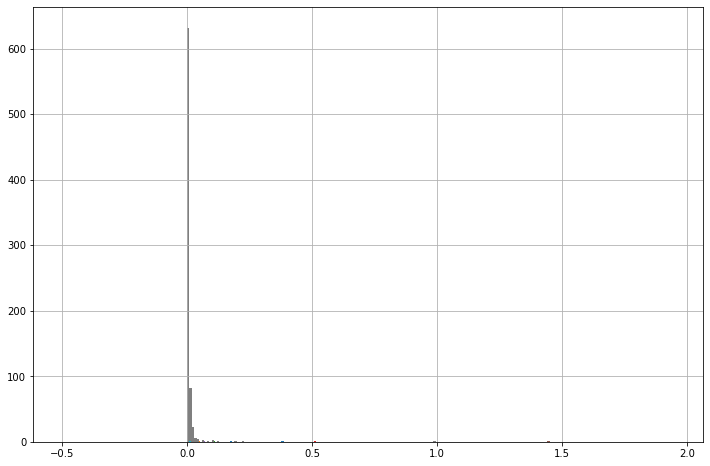

In [18]:
for key,value in selected_dfs.items():
    print(key)
    surface_noise_numbers(value)
    print("************************")

In [19]:
toshka_lakes[['MODIS_LST', 'prediction_1','prediction_2','prediction_3','prediction_4']]

,MODIS_LST,prediction_1,prediction_2,prediction_3,prediction_4
70081,318.107666,320.253357,318.591034,318.186615,317.91391


In [20]:
gujarat_province[['MODIS_LST', 'prediction_1','prediction_2','prediction_3','prediction_4']]

,MODIS_LST,prediction_1,prediction_2,prediction_3,prediction_4
71526,313.741486,302.394409,299.94342,302.556854,302.173462


In [21]:
gujarat_province

,latitude_ERA,longitude_ERA,MODIS_LST,prediction_error_1,prediction_1,prediction_error_2,prediction_2,prediction_error_3,prediction_3,prediction_error_4,...,cvhFr_change_is_significant,cvlFr_change_is_significant,oceanFr_change_is_significant,si10Fr_change_is_significant,dl_change_is_significant,z_change_is_significant,bitstring,variance,median_error,mean_error
71526,24.028095,69.0,313.741486,11.409581,302.394409,13.81443,299.94342,11.268782,302.556854,11.615454,...,False,False,False,False,True,True,1001001,1.440126,11.512518,12.027061


In [22]:
gujarat_province

,latitude_ERA,longitude_ERA,MODIS_LST,prediction_error_1,prediction_1,prediction_error_2,prediction_2,prediction_error_3,prediction_3,prediction_error_4,...,cvhFr_change_is_significant,cvlFr_change_is_significant,oceanFr_change_is_significant,si10Fr_change_is_significant,dl_change_is_significant,z_change_is_significant,bitstring,variance,median_error,mean_error
71526,24.028095,69.0,313.741486,11.409581,302.394409,13.81443,299.94342,11.268782,302.556854,11.615454,...,False,False,False,False,True,True,1001001,1.440126,11.512518,12.027061


In [23]:
juncal_glacier['longitude_ERA'].to_numpy()[0]

-70.07999999999998

In [24]:
juncal_glacier

,latitude_ERA,longitude_ERA,MODIS_LST,prediction_error_1,prediction_1,prediction_error_2,prediction_2,prediction_error_3,prediction_3,prediction_error_4,...,cvhFr_change_is_significant,cvlFr_change_is_significant,oceanFr_change_is_significant,si10Fr_change_is_significant,dl_change_is_significant,z_change_is_significant,bitstring,variance,median_error,mean_error
6228,-33.021066,-70.08,290.502838,5.12222,286.590363,4.953893,286.494507,5.581362,285.653046,5.855265,...,False,False,False,True,True,False,0001010,0.171476,5.351791,5.378185
